Nesta lição iremos criar um gráfico de temperatura com dados da estação Meteorológica de Brasília que fica no Sudoeste. Os dados foram baixados diretamente do servidor de dados do INMET. 

Vamos utilizar 3 bibliotecas: csv, matplotlib e datetime. 

In [6]:
import csv # comma separated values
import matplotlib.pyplot as plt
from datetime import datetime

filename = '../dados/estacao_brasilia/temperatura.csv'
date_format = '%Y-%m-%d'

In [3]:
def is_float(str):
    possible_float_number = str.replace('.','')
    return possible_float_number.isnumeric()

Vamos investigar os dados primeiro.

In [7]:
with open(filename) as csv_file:
    reader = csv.reader(csv_file, delimiter=';')

    n = 0 
    for row in reader:
        print(row)
        n = n+1
        if n >20:
            break

['Nome: BRASILIA']
['Codigo Estacao: A001']
['Latitude: -15.78944444']
['Longitude: -47.92583332']
['Altitude: 1160.96']
['Situacao: Operante']
['Data Inicial: 2000-05-06']
['Data Final: 2023-06-28']
['Periodicidade da Medicao: Diaria']
[]
['Data Medicao', 'TEMPERATURA MEDIA DIARIA (AUT)(°C)', '']
['2000-05-06', 'null', '']
['2000-05-07', 'null', '']
['2000-05-08', '22,1375', '']
['2000-05-09', '22,058333', '']
['2000-05-10', '22,391667', '']
['2000-05-11', '21,304167', '']
['2000-05-12', '20,116667', '']
['2000-05-13', '18,908333', '']
['2000-05-14', '18,6875', '']
['2000-05-15', '19,033333', '']


Agora é pra valer!

In [8]:
with open(filename) as csv_file:
    reader = csv.reader(csv_file, delimiter=';')
    
    dates = list()
    temperatures = list()
    for row in reader:
        
        if len(row) < 2: # Skipping INMET header for each station. These records only have one field/column.
            print(row)
            continue        
                
        temperature = row[1].replace(',','.')
        
        if is_float(temperature):
            date = datetime.strptime(row[0], date_format)
            temperature = float(temperature)
        else: 
            continue
            
        dates.append(date)
        temperatures.append(temperature)
        
    print(f'Got {len(dates)} data points. ')

['Nome: BRASILIA']
['Codigo Estacao: A001']
['Latitude: -15.78944444']
['Longitude: -47.92583332']
['Altitude: 1160.96']
['Situacao: Operante']
['Data Inicial: 2000-05-06']
['Data Final: 2023-06-28']
['Periodicidade da Medicao: Diaria']
[]
[]
Got 8113 data points. 


In [9]:
dates[0], temperatures[0]

(datetime.datetime(2000, 5, 8, 0, 0), 22.1375)

Agora vamos plotar!

In [10]:
import matplotlib.pyplot as plt

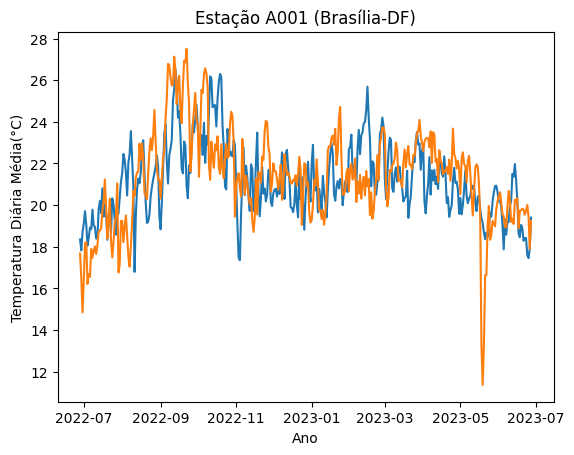

In [22]:
plt.plot(dates[-365:],temperatures[-365:],dates[-365:],temperatures[-730:-365])
plt.xlabel('Ano')
plt.ylabel('Temperatura Diária Média(°C)')
plt.title('Estação A001 (Brasília-DF)')
#plt.savefig('temperature.png')
plt.show()

In [21]:
dates[0]

datetime.datetime(2000, 5, 8, 0, 0)